In [1]:
# loading GWSNR class from the gwsnr package
import gwsnr
import numpy as np

# initializing the GWSNR class with default parameters
# running for the first time, with default initialization parameters, will create a new directory in the current working directory and copy the default interpolation files
# if you want to gererate new interpolation files, you can either change the input arguments (e.g various resolutions, psds etc.) or set `create_new_interpolator=True`
gwsnr = gwsnr.GWSNR()

GWSNR: Setting multiprocessing start method to 'fork'.
If you need to use the 'spawn' method (in case error or warning due to other library dependencies),
set the environment variable GWSNR_USE_SPAWN=True *before* running your script.
Command line (single line):
    GWSNR_USE_SPAWN=True python yourscript.py
In a Python script (before importing GWSNR):
    import os
    os.environ['GWSNR_USE_SPAWN'] = 'True'
    import gwsnr


Initializing GWSNR class...

Copying interpolator data from the library resource /Users/phurailatpamhemantakumar/phd/mypackages/gwsnr/gwsnr/core/interpolator_pickle to the current working directory.
psds not given. Choosing bilby's default psds
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_2.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/partialSNR_dict_2.pickle
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/partialSNR_dict_2.pickle

Chosen GWSNR initialization

In [36]:
# gerneral case, random parameters
# add random seed for reproducibility
np.random.seed(42)
nsamples = 1000
mtot = np.linspace(2*4.98, 2*112.5,nsamples)
mass_ratio = 0.6
param_dict = dict(
    # convert to component masses
    mass_1 = mtot / (1 + mass_ratio),
    mass_2 = mtot * mass_ratio / (1 + mass_ratio),
    # Fix luminosity distance
    luminosity_distance = np.random.uniform(100, 10000, size=nsamples),
    # Randomly sample everything else:
    theta_jn = np.random.uniform(0,2*np.pi, size=nsamples),
    ra = np.random.uniform(0,2*np.pi, size=nsamples), 
    dec = np.random.uniform(-np.pi/2,np.pi/2, size=nsamples), 
    psi = np.random.uniform(0,2*np.pi, size=nsamples),
    phase = np.random.uniform(0,2*np.pi, size=nsamples),
    geocent_time = 1246527224.169434+np.random.uniform(0,365*24*3600, size=nsamples),
    a_1 = 0.5,
    a_2 = 0.5,
)

# compute partial SNRs for the given parameters


In [37]:
bilby_snr = gwsnr.compute_bilby_snr(gw_param_dict=param_dict)

100%|█████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1332.78it/s]


In [38]:
from gwsnr.numba import antenna_response_array
Fp, Fc = antenna_response_array(ra=param_dict['ra'], dec=param_dict['dec'], time=param_dict['geocent_time'], psi=param_dict['psi'], detector_tensor=gwsnr.detector_tensor_list)

Mc = ((param_dict['mass_1'] * param_dict['mass_2']) ** (3. / 5.)) / ((param_dict['mass_1'] + param_dict['mass_2']) ** (1. / 5.))
A1 = Mc ** (5.0 / 6.0)
ci_2 = np.cos(param_dict['theta_jn']) ** 2
ci_param = ((1 + np.cos(param_dict['theta_jn']) ** 2) / 2) ** 2

d_eff = param_dict['luminosity_distance'] / np.sqrt(Fp ** 2 * ci_param + Fc ** 2 * ci_2)
snr_partial_mtot = bilby_snr['L1'] * d_eff[0] / A1 

[]

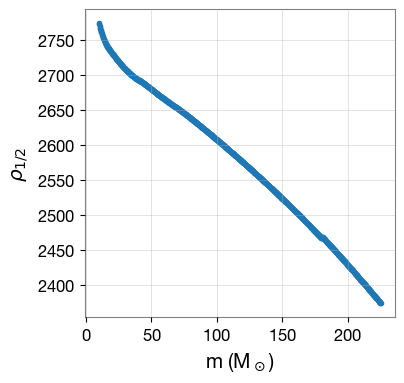

In [ ]:
# plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.plot(mtot, snr_partial_mtot, '.')
plt.xlabel(r'$m$ (M$_\odot$)')
plt.ylabel(r'$\rho_{1/2}$')
plt.grid(alpha=0.5)
plt.plot()

In [40]:
# gerneral case, random parameters
# add random seed for reproducibility
np.random.seed(42)
nsamples = 1000
mtot = 30.0
mass_ratio = np.linspace(0.2, 1.0, nsamples)
param_dict = dict(
    # convert to component masses
    mass_1 = mtot / (1 + mass_ratio),
    mass_2 = mtot * mass_ratio / (1 + mass_ratio),
    # Fix luminosity distance
    luminosity_distance = np.random.uniform(100, 10000, size=nsamples),
    # Randomly sample everything else:
    theta_jn = np.random.uniform(0,2*np.pi, size=nsamples),
    ra = np.random.uniform(0,2*np.pi, size=nsamples), 
    dec = np.random.uniform(-np.pi/2,np.pi/2, size=nsamples), 
    psi = np.random.uniform(0,2*np.pi, size=nsamples),
    phase = np.random.uniform(0,2*np.pi, size=nsamples),
    geocent_time = 1246527224.169434+np.random.uniform(0,365*24*3600, size=nsamples),
    a_1 = 0.5,
    a_2 = 0.5,
)

bilby_snr = gwsnr.compute_bilby_snr(gw_param_dict=param_dict)

from gwsnr.numba import antenna_response_array
Fp, Fc = antenna_response_array(ra=param_dict['ra'], dec=param_dict['dec'], time=param_dict['geocent_time'], psi=param_dict['psi'], detector_tensor=gwsnr.detector_tensor_list)

Mc = ((param_dict['mass_1'] * param_dict['mass_2']) ** (3. / 5.)) / ((param_dict['mass_1'] + param_dict['mass_2']) ** (1. / 5.))
A1 = Mc ** (5.0 / 6.0)
ci_2 = np.cos(param_dict['theta_jn']) ** 2
ci_param = ((1 + np.cos(param_dict['theta_jn']) ** 2) / 2) ** 2

d_eff = param_dict['luminosity_distance'] / np.sqrt(Fp ** 2 * ci_param + Fc ** 2 * ci_2)
snr_partial_q = bilby_snr['L1'] * d_eff[0] / A1 

100%|█████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1423.34it/s]


[]

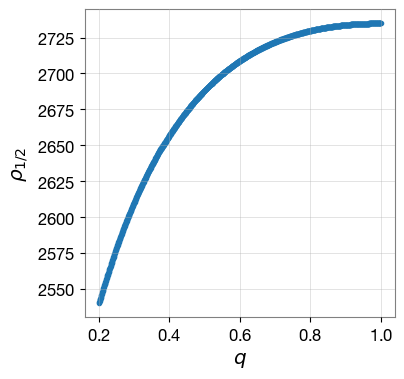

In [ ]:
# plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.plot(mass_ratio, snr_partial_q, '.')
plt.xlabel(r'$q$')
plt.ylabel(r'$\rho_{1/2}$')
plt.grid(alpha=0.5)
plt.plot()

In [44]:
# gerneral case, random parameters
# add random seed for reproducibility
np.random.seed(42)
nsamples = 1000
mtot = 30.0
mass_ratio = 0.6
param_dict = dict(
    # convert to component masses
    mass_1 = mtot / (1 + mass_ratio),
    mass_2 = mtot * mass_ratio / (1 + mass_ratio),
    # Fix luminosity distance
    luminosity_distance = np.random.uniform(100, 10000, size=nsamples),
    # Randomly sample everything else:
    theta_jn = np.random.uniform(0,2*np.pi, size=nsamples),
    ra = np.random.uniform(0,2*np.pi, size=nsamples), 
    dec = np.random.uniform(-np.pi/2,np.pi/2, size=nsamples), 
    psi = np.random.uniform(0,2*np.pi, size=nsamples),
    phase = np.random.uniform(0,2*np.pi, size=nsamples),
    geocent_time = 1246527224.169434+np.random.uniform(0,365*24*3600, size=nsamples),
    a_1 = np.linspace(-0.8, 0.8, nsamples),
    a_2 = 0.5,
)

bilby_snr = gwsnr.compute_bilby_snr(gw_param_dict=param_dict)

from gwsnr.numba import antenna_response_array
Fp, Fc = antenna_response_array(ra=param_dict['ra'], dec=param_dict['dec'], time=param_dict['geocent_time'], psi=param_dict['psi'], detector_tensor=gwsnr.detector_tensor_list)

Mc = ((param_dict['mass_1'] * param_dict['mass_2']) ** (3. / 5.)) / ((param_dict['mass_1'] + param_dict['mass_2']) ** (1. / 5.))
A1 = Mc ** (5.0 / 6.0)
ci_2 = np.cos(param_dict['theta_jn']) ** 2
ci_param = ((1 + np.cos(param_dict['theta_jn']) ** 2) / 2) ** 2

d_eff = param_dict['luminosity_distance'] / np.sqrt(Fp ** 2 * ci_param + Fc ** 2 * ci_2)
snr_partial_a_1 = bilby_snr['L1'] * d_eff[0] / A1 

100%|█████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1332.63it/s]


[]

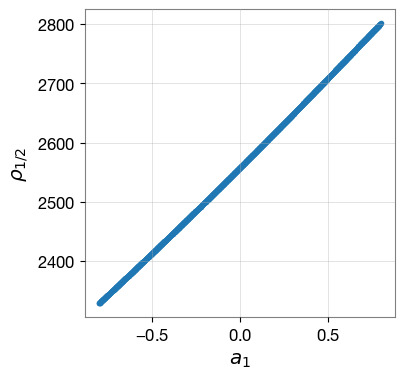

In [ ]:
# plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.plot(param_dict['a_1'], snr_partial_a_1, '.')
plt.xlabel(r'$a_1$')
plt.ylabel(r'$\rho_{1/2}$')
plt.grid(alpha=0.5)
plt.plot()

In [46]:
# gerneral case, random parameters
# add random seed for reproducibility
np.random.seed(42)
nsamples = 1000
mtot = 30.0
mass_ratio = 0.6
param_dict = dict(
    # convert to component masses
    mass_1 = mtot / (1 + mass_ratio),
    mass_2 = mtot * mass_ratio / (1 + mass_ratio),
    # Fix luminosity distance
    luminosity_distance = np.random.uniform(100, 10000, size=nsamples),
    # Randomly sample everything else:
    theta_jn = np.random.uniform(0,2*np.pi, size=nsamples),
    ra = np.random.uniform(0,2*np.pi, size=nsamples), 
    dec = np.random.uniform(-np.pi/2,np.pi/2, size=nsamples), 
    psi = np.random.uniform(0,2*np.pi, size=nsamples),
    phase = np.random.uniform(0,2*np.pi, size=nsamples),
    geocent_time = 1246527224.169434+np.random.uniform(0,365*24*3600, size=nsamples),
    a_1 = 0.5,
    a_2 = np.linspace(-0.8, 0.8, nsamples),
)

bilby_snr = gwsnr.compute_bilby_snr(gw_param_dict=param_dict)

from gwsnr.numba import antenna_response_array
Fp, Fc = antenna_response_array(ra=param_dict['ra'], dec=param_dict['dec'], time=param_dict['geocent_time'], psi=param_dict['psi'], detector_tensor=gwsnr.detector_tensor_list)

Mc = ((param_dict['mass_1'] * param_dict['mass_2']) ** (3. / 5.)) / ((param_dict['mass_1'] + param_dict['mass_2']) ** (1. / 5.))
A1 = Mc ** (5.0 / 6.0)
ci_2 = np.cos(param_dict['theta_jn']) ** 2
ci_param = ((1 + np.cos(param_dict['theta_jn']) ** 2) / 2) ** 2

d_eff = param_dict['luminosity_distance'] / np.sqrt(Fp ** 2 * ci_param + Fc ** 2 * ci_2)
snr_partial_a_2 = bilby_snr['L1'] * d_eff[0] / A1 

100%|█████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1333.60it/s]


[]

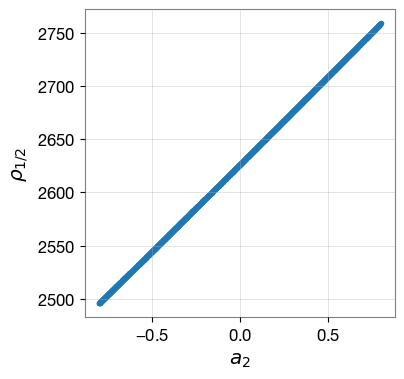

In [ ]:
# plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.plot(param_dict['a_2'], snr_partial_a_2, '.')
plt.xlabel(r'$a_2$')
plt.ylabel(r'$\rho_{1/2}$')
plt.grid(alpha=0.5)
plt.plot()

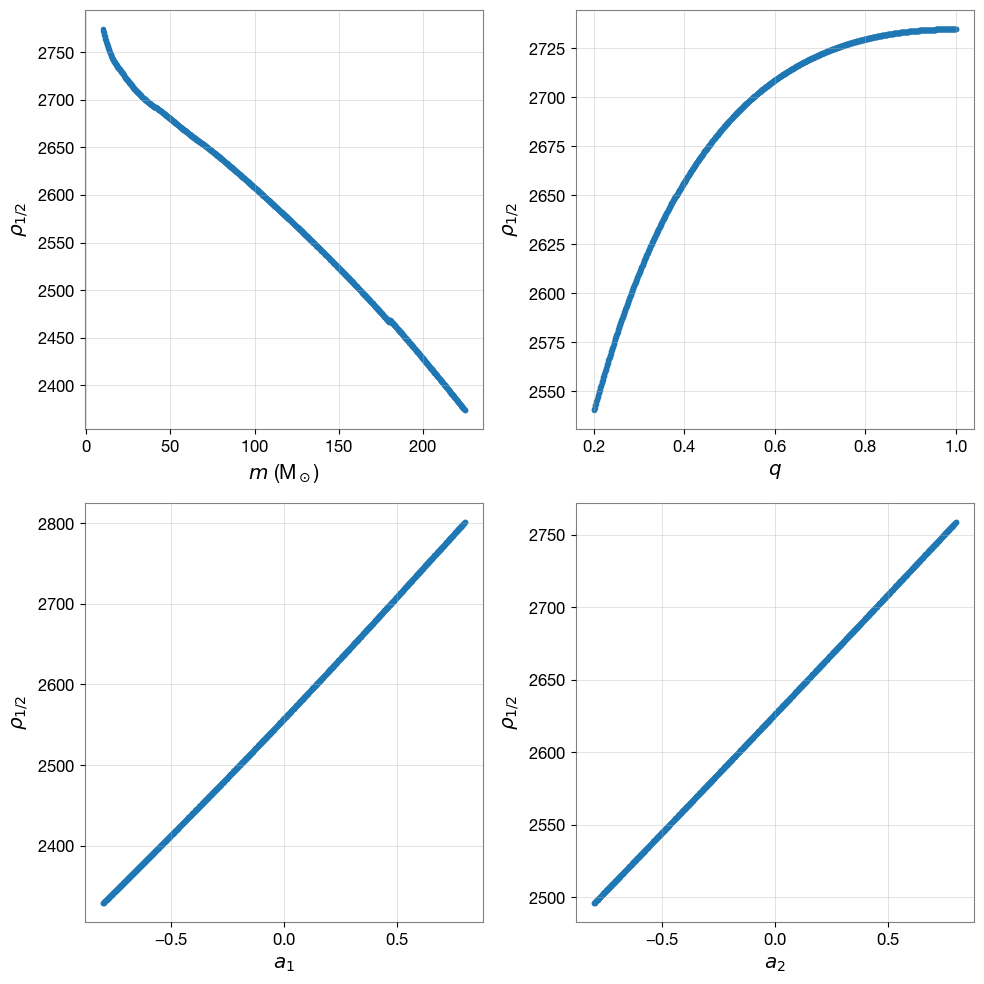

In [51]:
mtot = np.linspace(2*4.98, 2*112.5,nsamples)
mass_ratio = np.linspace(0.2, 1.0, nsamples)
a_1 = np.linspace(-0.8, 0.8, nsamples)
a_2 = np.linspace(-0.8, 0.8, nsamples)

# subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].plot(mtot, snr_partial_mtot, '.')
axs[0, 0].set_xlabel(r'$m$ (M$_\odot$)')
axs[0, 0].set_ylabel(r'$\rho_{1/2}$')
axs[0, 0].grid(alpha=0.5)
axs[0, 1].plot(mass_ratio, snr_partial_q, '.')
axs[0, 1].set_xlabel(r'$q$')
axs[0, 1].set_ylabel(r'$\rho_{1/2}$')
axs[0, 1].grid(alpha=0.5)
axs[1, 0].plot(a_1, snr_partial_a_1, '.')
axs[1, 0].set_xlabel(r'$a_1$')
axs[1, 0].set_ylabel(r'$\rho_{1/2}$')
axs[1, 0].grid(alpha=0.5)
axs[1, 1].plot(a_2, snr_partial_a_2, '.')
axs[1, 1].set_xlabel(r'$a_2$')
axs[1, 1].set_ylabel(r'$\rho_{1/2}$')
axs[1, 1].grid(alpha=0.5)
plt.tight_layout()
plt.savefig('gwsnr_partial_snr_examples.png', dpi=300)
plt.show()